# Analyse des coûts sur une base de données 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#C:\Users\Louis DE JUAN\Desktop
# Définition des variables d'environnement globales
# 
DATAPATH = '.'
FICHIER1 = 'data.csv'
FICHIER2 = 'data2.csv'
df_pannes = pd.read_csv(r"{0}/{1}".format(DATAPATH, FICHIER1), decimal=',')
df_cout = pd.read_csv(r"{0}/{1}".format(DATAPATH, FICHIER2), decimal=',')


## Section analyse des donnees

In [3]:
#
# Visualisation des données
#
df_cout.head(5)

,Id,Panne,Cout
0,349483,A,15.84
1,350021,D,19.14
2,350212,B,9.90
3,351351,F,4.40
4,351351,F,28.16


In [4]:
#
# Etude des données
#
# Test si tous les Id sont différents
n = df_pannes.shape[0]
n_unique = df_pannes['Id'].unique().shape[0]
print ('Taille des données initiales {0}, taille des données uniques {1}'.format(n, n_unique))

Taille des données initiales 461, taille des données uniques 451


In [5]:
#
# Visualisation des données
# Test si tous Id de la table coût sont uniques
df_cout.head(5)
n = df_cout.shape[0]
n_unique = df_cout['Id'].unique().shape[0]
print ('Taille des données de coûts initiales {0}, taille des données de coûts uniques {1}'.format(n, n_unique))

Taille des données de coûts initiales 109, taille des données de coûts uniques 75


### conclusion

Il existe des "doublons" dans les données des Ids. Un Id correspond au même article, alors certains articles ont eu **plusieurs pannes**. 


## Nettoyage des données 

on va creer des tables pannes et cout à id unique en supposant notre hypothèse : un id représente un composant et peut avoir plusieurs pannes

In [6]:
#
# Quels sont les indices en double
#
df_cout_size = df_cout[['Id']].groupby('Id').size()
parse_i = df_cout_size[df_cout_size == 2].index
#
# Recherche des Pannes types pour les indices en double
#
df_cout.set_index('Id').loc[df_cout_size[df_cout_size == 3].index]

,Panne,Cout
Id,,
354517,E,20.90
354517,E,0.00
354517,E,55.00
368848,E,11.88
368848,E,6.82
368848,E,55.00
369860,E,3.30
369860,E,55.00
369860,E,55.00


EN CONCLUSION toutes les Pannes associés à un ID sont les mêmes, seul change leur coût. 
On emet l'hypothèse qu'un composant peut être traité plusieurs fois, donc le cout de sa réparation est la somme de tous les coûts unitaires. Pour nous, la table coût sera le coût total par Id. 

In [7]:
#
#Creation d'une table cout avec la somme de TOUS les couts
#
df_cout_tt = df_cout.groupby('Id').sum()
df_cout[['Id','Panne']].groupby('Id').first()
df_cout_tt2=df_cout_tt.join(df_cout[['Id','Panne']].groupby('Id').first())
df_cout_tt2.head()

,Cout,Panne
Id,,
349483,15.84,A
350021,19.14,D
350212,9.90,B
351351,32.56,F
352686,38.94,D


In [8]:
#
# De même pour l'autre tableau : On associe le nombre total de composant défectueux pour plusieurs pannes
# analyse : il y a certains Id en double ou en triple , on supposera qu'il y a eu 2 fois la panne
#  

df_pannes_size = df_pannes[['Id']].groupby('Id').size()
parse_i = df_pannes_size[df_pannes_size == 2].index
df_pannes.set_index('Id').loc[parse_i]

,Version,D1,D2,Panne,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
Id,,,,,,,,,,,,,,,,,,,
360575,v3,14571.35,13407.85,G,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
360575,v3,14571.35,13407.85,G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
369824,v3,11542.95,20494.03,A,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
369824,v1,30546.16,33090.20,A,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
370540,v3,14569.09,19757.11,G,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
370540,v3,14555.53,19743.76,G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
373505,v1,11761.04,4002.33,D,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
373505,v1,7135.95,19375.30,D,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
374836,v3,16596.31,16170.41,A,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#
#Creation d'une table pannes avec la somme de TOUS les occurences
#hypothèses: on ne fait pas attention au delais, on additions des composant pour chaque Id car c'est une autre pannes sur le même article
#par contre on ne prend que la premiere version 
#
columns=['Id','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15']
df_pannes_tt = df_pannes[columns].groupby('Id').sum()
df_pannes_v=df_pannes[['Id','Version','Panne']].groupby('Id').first()
df_pannes_tt2=df_pannes_tt.join(df_pannes_v)
df_pannes_tt2.head()



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Version,Panne
Id,,,,,,,,,,,,,,,,,
348606,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,v3,G
348762,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,v2,A
348855,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,v1,A
348906,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,v2,C
348946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,v3,D


In [10]:
#
#On merge les 2 tables cleans par Id , on aura seulement un seul Id : le cout associé a la reparation de cet article 
#
df_table_merge=pd.merge(df_pannes_tt2 ,df_cout_tt2,how="inner", on=["Id","Panne"])


### Visualisation des occurences

         X1  X2  X3   X4  X5   X6  X7  X8  X9  X10  X11  X12  X13  X14  X15
Version                                                                    
v1       90  45  41  142   9  146  53   9  22   40   10    0   21  107   31
v2        4   2   3   12   0   11   4   1   1    4    1    0    0    6    0
v3       61  39  24   90   9   88  26   7  16   18    6    0    7   63   23
[(0, 0, 0, 'X12', 0), (9, 1, 7, 'X8', 25), (10, 1, 6, 'X11', 26), (9, 0, 9, 'X5', 27), (21, 0, 7, 'X13', 49), (22, 1, 16, 'X9', 60), (31, 0, 23, 'X15', 85), (40, 4, 18, 'X10', 98), (41, 3, 24, 'X3', 106), (45, 2, 39, 'X2', 129), (53, 4, 26, 'X7', 132), (90, 4, 61, 'X1', 241), (107, 6, 63, 'X14', 277), (142, 12, 90, 'X4', 374), (146, 11, 88, 'X6', 380)]


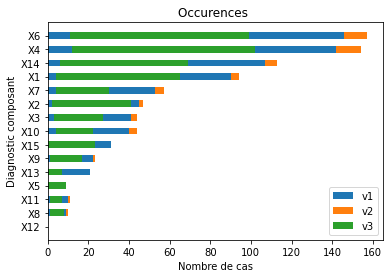

In [11]:
columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']
df_pannes_version = df_pannes_tt2.groupby(['Version']).sum()
print(df_pannes_version)
df_list_version=df_pannes_version.values.tolist()

#pour le tri je fais la somme des v1 v2 v3 pour savoir quels X est le plus grand 
df_list_version.append(columns)
df_list_version.append([df_list_version[0][i]+df_list_version[0][i]+df_list_version[2][i] for i in range(len(columns))])

#on cree une liste tuple pour pouvoir faire un sort selon une clé, celle de la somme 
df_list_triee=list(zip(df_list_version[0], df_list_version[1], df_list_version[2], df_list_version[3], df_list_version[4]))

#on trie par la somme
df_list_triee.sort(key = lambda x: x[4])


#on dézippe

print(df_list_triee)
unzipped=list(zip(*df_list_triee))

df_list_version=unzipped

#on affiche avec barh pour les barres horizontales
fig, ax = plt.subplots() 
 
width=0.5

ax.barh(df_list_version[3],df_list_version[0], width, label ='v1') 
ax.barh(df_list_version[3],df_list_version[1], width, left = df_list_version[0],label ='v2')
ax.barh(df_list_version[3],df_list_version[2], width, left = df_list_version[1] ,label ='v3') 

ax.set_xlabel('Nombre de cas') 
ax.set_ylabel('Diagnostic composant') 
ax.legend() 
   
ax.set_title('Occurences ') 
   
plt.show() 

## Modelisation par regression lineaire

In [12]:
#Pour le modèle on remplace les donnees categorielles en donnees numeriques


from sklearn.preprocessing import OrdinalEncoder

df_table_merge_ord=df_table_merge
ord_enc = OrdinalEncoder()
df_table_merge_ord["Version"] = ord_enc.fit_transform(df_table_merge_ord[["Version"]])


df_table_merge_ord["Panne"] = ord_enc.fit_transform(df_table_merge[["Panne"]])
df_table_merge_ord[["Version","Panne"]].head(11)



,Version,Panne
Id,,
350021,0.0,3.0
350212,1.0,1.0
351351,0.0,5.0
352686,2.0,3.0
353361,2.0,4.0
353373,0.0,0.0
354172,1.0,4.0
354517,0.0,4.0
355395,2.0,4.0


In [13]:
#On fait un modèle ou on divise le training set et le test set

columns_2=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15','Version','Panne']

X= df_table_merge_ord[columns_2].to_numpy()
y= df_table_merge_ord[["Cout"]].to_numpy()

print(X)

#80% training 20% test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 







[[0. 0. 0. ... 0. 0. 3.]
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 5.]
 ...
 [0. 0. 0. ... 0. 0. 2.]
 [1. 0. 0. ... 0. 0. 7.]
 [0. 0. 0. ... 0. 0. 7.]]


In [14]:
#modele regression lineaire
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.coef_)
print(reg.intercept_)

print(reg.predict(X_test))
print(y_test)

#on a une fonction cout=f(X1,...,X15,version,panne)


-0.7258381402318304
[[ 2.76002904e+01  3.00122227e+00  1.84768874e+01  2.08982528e+01
  -1.44890192e+01 -8.89601768e+00 -1.69141224e+01  5.62869160e+01
   8.49560546e+00 -2.61443907e+00  1.93256740e+01  7.28306304e-14
   7.55692163e-01  2.88173917e+01  2.97231888e+00 -7.81975491e-04
   4.50501895e+00]]
[3.21084891]
[[ 37.71830043]
 [ 36.23121187]
 [ 63.56337327]
 [ 37.73817876]
 [ 39.82117723]
 [ 37.33439316]
 [ 19.69822463]
 [ 28.89891037]
 [ -0.18821664]
 [ 57.43438469]
 [ 35.00971948]
 [133.243954  ]
 [ 62.34627197]]
[[  9.46]
 [  1.98]
 [ 24.64]
 [ 32.56]
 [115.94]
 [ 29.26]
 [110.  ]
 [ 14.52]
 [ 14.08]
 [  0.66]
 [ 97.24]
 [  1.98]
 [110.  ]]


Il y a certains cout predit qui peuvent être négatif car c'est un modèle de regression linéaire

In [15]:
#modele lineaire avec penalisation d'ordre 2
from sklearn.linear_model import Ridge

alphas=np.linspace(0,100,50)

#trouvons le meilleur alpha
for alpha in alphas:
    clf = Ridge(alpha)
    reg =clf.fit(X_train, y_train)
    print(reg.score(X_test, y_test),alpha)

    
clf_top=Ridge(alpha=0)
reg1=clf_top.fit(X_train,y_train)
print(reg1.predict(X_test))
print()
#on a une fonction cout=f(X1,...,X15,version,panne)

    

-0.725838140231831 0.0
-0.6181475859211301 2.0408163265306123
-0.5766329537825872 4.081632653061225
-0.5436549296563384 6.122448979591837
-0.5146264487518233 8.16326530612245
-0.4885436401178267 10.204081632653061
-0.4649707142100947 12.244897959183675
-0.44360170247038355 14.285714285714286
-0.4241788470011867 16.3265306122449
-0.40647582892980094 18.367346938775512
-0.3902934003601708 20.408163265306122
-0.37545694914014693 22.448979591836736
-0.3618140938253509 24.48979591836735
-0.34923217517898886 26.53061224489796
-0.337595792315146 28.571428571428573
-0.3268045081783102 30.612244897959183
-0.31677078827893856 32.6530612244898
-0.3074181912691567 34.69387755102041
-0.2986798035145044 36.734693877551024
-0.2904968967772985 38.775510204081634
-0.2828177831599381 40.816326530612244
-0.2755968409209677 42.85714285714286
-0.26879368645299406 44.89795918367347
-0.2623724703302832 46.93877551020408
-0.2563012782066627 48.9795918367347
-0.2505516201210931 51.02040816326531
-0.24509799428

## On applique le modele sur toute la table des pannes

indépendamment que l'echantillon est servi pour l'entrainement

In [16]:

#on va appliquer notre fonction reg1 a toute la table panne
#deja il faut remettre panne et version sous forme numeric 

df_pannes_tt2_ord=df_pannes_tt2.copy()
ord_enc = OrdinalEncoder()
df_pannes_tt2_ord["Version"] = ord_enc.fit_transform(df_pannes_tt2_ord[["Version"]])
df_pannes_tt2_ord["Panne"] = ord_enc.fit_transform(df_pannes_tt2_ord[["Panne"]])
print(df_pannes_tt2_ord[["Version","Panne"]].head(11))

#on la mets sous numpy pour les calculs 

X_fin= df_pannes_tt2_ord[columns_2].to_numpy()

#et on predit 

print(len(X_fin))
Y_cout=reg1.predict(X_fin)
#print(Y_cout)
print(len(Y_cout))



        Version  Panne
Id                    
348606      2.0    6.0
348762      1.0    0.0
348855      0.0    0.0
348906      1.0    2.0
348946      2.0    3.0
349075      2.0    0.0
349134      2.0    0.0
349328      0.0    2.0
349780      2.0    0.0
349921      0.0    0.0
349963      2.0    5.0
451
451


In [17]:
#on rentre les nouvelles vals de cout_predit dans la df_pannes
df_pannes_tt2_pred=df_pannes_tt2.copy()
df_pannes_tt2_pred['cout_predit']=Y_cout
df_pannes_tt2_pred.head()
#ici on a le cout total prédit pour chaque ID


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Version,Panne,cout_predit
Id,,,,,,,,,,,,,,,,,,
348606,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,v3,G,42.241634
348762,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,v2,A,71.499218
348855,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,v1,A,87.493214
348906,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,v2,C,-7.308457
348946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,v3,D,19.696661


In [18]:
#pour trouver le prix pour une occurrence on recree un dataframe et on applique le modèle par ligne en prenant chaque occurence 
#une par une et nulle le reste des occurences
#exemple : pour X3=1 dans la premiere ligne : cout_unitaire=f(0,0,1,0,..,0,version,panne)
df_pannes_tt2_ord.head()

r=[]
for index,rows in df_pannes_tt2_ord.iterrows():
    one_r = [0]*15
    for i in range(0,15):
        r_c=rows.copy()
        r_c[0:15]=0
        if rows[i]!=0:
            r_c[i]=rows[i]
            one_r[i] = reg1.predict([r_c])[0][0]
            
    r.append(one_r)
    
print(r)
    

    
            
            

  

[[0, 0, 0, 51.13765143812095, 0, 21.343380961807526, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 24.10831972574936, 0, -5.6859507505640625, 0, 59.49698291687682, 0, 0, 0, 0, 0, 0, 0], [30.81113933783284, 0, 21.6877362594539, 24.109101701240206, 0, -5.685168775073215, 0, 0, 0, 0.5964098407831346, 0, 0, 0, 32.028240629608355, 0], [0, 0, 0, 0, 0, 0, -4.694017563988812, 0, 0, 9.605665761246433, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19.696660682635784], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6.210507230782239, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 33.11913959719435, 0, 3.32486912088093, 0, 0, 0, 0, 0, 0, 0, 41.0382785255625, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32.02667667862666, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6.18316778968626], [0, 0, 0, 0, 0, 16.83836201383045, 0, 0, 0, 0, 0, 0, 0, 54.551771418512025, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 24.109101701240206, 0, -5.685168775073215, 0, 0, 0, 0, 0, 0, 0, 0, 

## Visualisation

In [20]:

df_cout_o = pd.DataFrame(columns=columns[:], data = r)

In [21]:
df_cout_o['Version'] =df_pannes_tt2['Version'].values
df_cout_o['Panne'] =df_pannes_tt2['Panne'].values


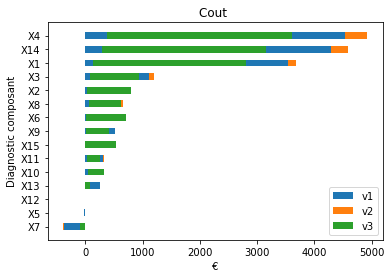

In [22]:
columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']
df_pannes_version = df_cout_o.groupby(['Version']).sum()

df_list_version=df_pannes_version.values.tolist()

#pour le tri je fais la somme des v1 v2 v3 pour savoir quels X est le plus grand 
df_list_version.append(columns)
df_list_version.append([df_list_version[0][i]+df_list_version[0][i]+df_list_version[2][i] for i in range(len(columns))])

#on cree une liste tuple pour pouvoir faire un sort selon une clé, celle de la somme 
df_list_triee=list(zip(df_list_version[0], df_list_version[1], df_list_version[2], df_list_version[3], df_list_version[4]))

#on trie par la somme
df_list_triee.sort(key = lambda x: x[4])


#on dézippe

unzipped=list(zip(*df_list_triee))

df_list_version=unzipped

#on affiche avec barh pour les barres horizontales
fig, ax = plt.subplots() 
 
width=0.5

ax.barh(df_list_version[3],df_list_version[0], width, label ='v1') 
ax.barh(df_list_version[3],df_list_version[1], width, left = df_list_version[0],label ='v2')
ax.barh(df_list_version[3],df_list_version[2], width, left = df_list_version[1] ,label ='v3') 

ax.set_xlabel('€') 
ax.set_ylabel('Diagnostic composant') 
ax.legend() 
   
ax.set_title('Cout ') 
   
plt.show() 

En conclusion le modèle en lui même etant linéaire, on peut avoir des predictions négatives de cout ce qui est un peu iréaliste mais dans l'idee le client devra se poser des question sur les composantes X4,x14 et x1 sur la version 3